Enem - Comparação da média das notas do aluno com a Renda e escolaridade dos seus pais.

A partir da prova de 2009 o enem passou a ter 180 questões e ser separada em dois dias, como é hoje em dia. De 1988 a 2008 a prova tinha 63 questões e acontecia em apenas um dia. Teremos duas análises, uma até 2008 e outra a partir de 2009.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from math import *
from scipy.stats import *

In [44]:
%matplotlib notebook
import cmath
plt.style.use('ggplot')

import itertools
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm2  #Usa OLS como no R

In [3]:
dados15 = pd.read_csv('dados15resumo.csv', encoding="latin1", sep=',')

In [4]:
DADOS15 = dados15[pd.notnull(dados15.NU_ANO)&pd.notnull(dados15.NU_INSCRICAO)&pd.notnull(dados15.NU_NOTA_CN)&pd.notnull(dados15.NU_NOTA_CH)&pd.notnull(dados15.NU_NOTA_LC)&pd.notnull(dados15.NU_NOTA_MT)&pd.notnull(dados15.Q001)&pd.notnull(dados15.Q002)&pd.notnull(dados15.Q003)&pd.notnull(dados15.Q004)&pd.notnull(dados15.Q005)&pd.notnull(dados15.Q006)]


In [5]:
DADOS15.Q001 = DADOS15.Q001.astype('category')
DADOS15.Q001.cat.categories = (['NUNCA', '5ANO INCOMPLETO','9ANO INCOMPLETO','EM INCOMPLETO','FACULDADE INCOMPLETA','PÓS INCOMPLETA','COMPLETOU PÓS','NÃO SEI'])
DADOS15.Q002 = DADOS15.Q002.astype('category')
DADOS15.Q002.cat.categories = (['NUNCA', '5ANO INCOMPLETO','9ANO INCOMPLETO','EM INCOMPLETO','FACULDADE INCOMPLETA','PÓS INCOMPLETA','COMPLETOU PÓS','NÃO SEI'])
DADOS15.Q003 = DADOS15.Q003.astype('category')
DADOS15.Q003.cat.categories = (['LAVRADOR...', 'DIARISTA, VIGILANTE...','PADEIRO, MECÂNICO(A)','PROFESSOR, CORRETOR...','MÉDICO, ENGENHEIRO...','NÃO SEI'])
DADOS15.Q004 = DADOS15.Q004.astype('category')
DADOS15.Q004.cat.categories = (['LAVRADOR...', 'DIARISTA, VIGILANTE...','PADEIRO, MECÂNICO(A)','PROFESSOR, CORRETOR...','MÉDICO, ENGENHEIRO...','NÃO SEI'])
DADOS15.Q006 = DADOS15.Q006.astype('category')
DADOS15.Q006.cat.categories = (['NENHUMA', 'ATÉ 788','ATÉ 1182','ATÉ 1572','ATÉ1970','ATÉ 2364', 'ATÉ 3152','ATÉ 3940','ATÉ 4728','ATÉ 5516', 'ATÉ 6304', 'ATÉ 7092','ATÉ 7880','ATÉ 9456','ATÉ 11820', 'ATÉ 15760','ACIMA DE 15760'])


DADOS15.head()

C:\Users\manucirne\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Unnamed: 0,NU_ANO,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006
0,0,2015,150000000376,657.4,705.3,591.1,732.3,760.0,NUNCA,NUNCA,LAVRADOR...,LAVRADOR...,3.0,ATÉ 1572
2,2,2015,150000001161,528.5,531.1,511.3,566.5,640.0,FACULDADE INCOMPLETA,9ANO INCOMPLETO,"PROFESSOR, CORRETOR...","DIARISTA, VIGILANTE...",3.0,ATÉ 788
4,4,2015,150000001219,679.9,730.6,621.2,732.4,800.0,5ANO INCOMPLETO,9ANO INCOMPLETO,"PADEIRO, MECÂNICO(A)",LAVRADOR...,5.0,ATÉ 3152
5,5,2015,150000002884,598.7,658.0,579.0,576.4,480.0,EM INCOMPLETO,9ANO INCOMPLETO,"DIARISTA, VIGILANTE...",NÃO SEI,4.0,ATÉ 2364
6,6,2015,150000002510,652.1,671.9,609.3,685.5,820.0,PÓS INCOMPLETA,PÓS INCOMPLETA,"MÉDICO, ENGENHEIRO...","MÉDICO, ENGENHEIRO...",3.0,ATÉ 5516


In [6]:
MEDIA = 0
MEDIA = (DADOS15.NU_NOTA_CN + DADOS15.NU_NOTA_CH + DADOS15.NU_NOTA_LC + DADOS15.NU_NOTA_MT + DADOS15.NU_NOTA_REDACAO)/5


In [7]:
DADOS15['MEDIA'] = MEDIA

C:\Users\manucirne\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [8]:
DADOS15.columns = ["contagem","ANO","INSCRICAO","NOTA_CN","NOTA_CH","NOTA_LC","NOTA_MT","NOTA_REDACAO","ESTUDO_PAI","ESTUDO_MÃE","TRABALHO_PAI","TRABALHO_MAE","MORADORES_CASA","RENDA_FAMILIAR","MEDIA_NOTAS"]

<IPython.core.display.Javascript object>


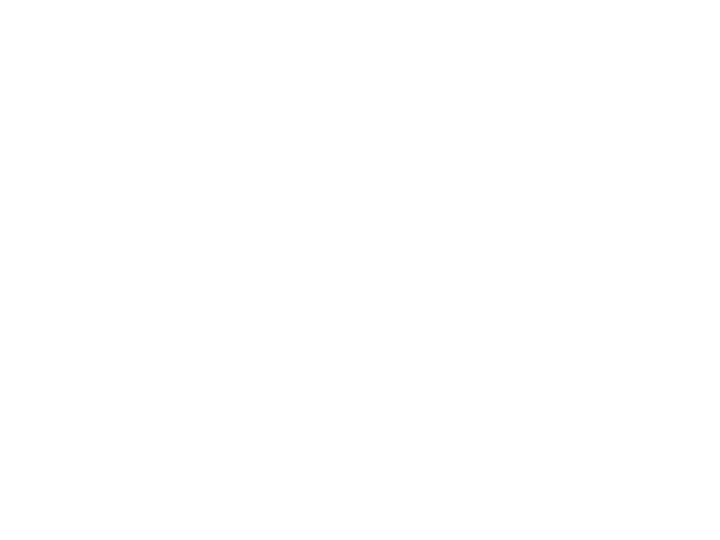

In [9]:
DADOS15_RB = DADOS15[((DADOS15.RENDA_FAMILIAR) == 'NENHUMA')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 788')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 1182')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 1572')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ1970')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 2364')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 3152')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 3940')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 4728')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 5516')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 6304')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 7092')]
DADOS15_RA = DADOS15[((DADOS15.RENDA_FAMILIAR) == 'ATÉ 7880')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 9456')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 11820')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 15760')|((DADOS15.RENDA_FAMILIAR) == 'ACIMA DE 15760')]
PLOT1 = DADOS15_RA.MEDIA_NOTAS.plot.hist(bins=50,title='NOTA MEDIA X RENDA - 2015', alpha=0.7, label='RENDA ALTA')
plt.legend()

In [10]:
PLOT1 = DADOS15_RB.MEDIA_NOTAS.plot.hist(bins = 50,title='NOTA MEDIA X RENDA - 2015', alpha=0.7, label='RENDA BAIXA')
plt.legend()

In [11]:
DADOS15_TP1 = DADOS15[((DADOS15.ESTUDO_PAI) == 'NUNCA')|((DADOS15.RENDA_FAMILIAR) == '5ANO INCOMPLETO')|((DADOS15.RENDA_FAMILIAR) == '9ANO INCOMPLETO')|((DADOS15.RENDA_FAMILIAR) == 'EM INCOMPLETO')]
DADOS15_TP2 = DADOS15[((DADOS15.ESTUDO_PAI) == 'FACULDADE INCOMPLETA')|((DADOS15.RENDA_FAMILIAR) == 'PÓS INCOMPLETA')|((DADOS15.RENDA_FAMILIAR) == 'COMPLETOU PÓS')]
PLOT1 = DADOS15_TP1.MEDIA_NOTAS.plot.hist(bins = 50,title='NOTA MEDIA X TRABALHO DO PAI - 2015', alpha=0.7, label='TP1')
plt.legend()


In [12]:
PLOT1 = DADOS15_TP2.MEDIA_NOTAS.plot.hist(bins = 50,title='NOTA MEDIA X TRABALHO DO PAI - 2015', alpha=0.7, label='TP2')
plt.legend()


In [13]:
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='NENHUMA'),'RENDAQT'] = 1
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 788'),'RENDAQT'] = 394
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 1182'),'RENDAQT'] = 985
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 1572'),'RENDAQT'] = 1377
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ1970'),'RENDAQT'] = 1771
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 2364'),'RENDAQT'] = 2167
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 3152'),'RENDAQT'] = 2758
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 3940'),'RENDAQT'] = 3546
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 4728'),'RENDAQT'] = 4334
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 5516'),'RENDAQT'] = 5122
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 6304'),'RENDAQT'] = 5910
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 7880'),'RENDAQT'] = 7092
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 9456'),'RENDAQT'] = 8668
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 11820'),'RENDAQT'] = 10638
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 15760'),'RENDAQT'] = 13790
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='MAIOR QUE 15760'),'RENDAQT'] = 20000 #ainda é um chute, mas será baseado com uma média da PNAD


C:\Users\manucirne\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\manucirne\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
DADOS15["RENDAPQ"] = DADOS15.RENDAQT/DADOS15.MORADORES_CASA

C:\Users\manucirne\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [15]:
DADOS15["RENDALOG"] = np.log10(DADOS15.RENDAQT)

C:\Users\manucirne\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [16]:
DADOS15 = DADOS15[pd.notnull(DADOS15.RENDAQT)]
DADOS15

,contagem,ANO,INSCRICAO,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_REDACAO,ESTUDO_PAI,ESTUDO_MÃE,TRABALHO_PAI,TRABALHO_MAE,MORADORES_CASA,RENDA_FAMILIAR,MEDIA_NOTAS,RENDAQT,RENDAPQ,RENDALOG
0,0,2015,150000000376,657.4,705.3,591.1,732.3,760.0,NUNCA,NUNCA,LAVRADOR...,LAVRADOR...,3.0,ATÉ 1572,689.22,1377.0,459.000000,3.138934
2,2,2015,150000001161,528.5,531.1,511.3,566.5,640.0,FACULDADE INCOMPLETA,9ANO INCOMPLETO,"PROFESSOR, CORRETOR...","DIARISTA, VIGILANTE...",3.0,ATÉ 788,555.48,394.0,131.333333,2.595496
4,4,2015,150000001219,679.9,730.6,621.2,732.4,800.0,5ANO INCOMPLETO,9ANO INCOMPLETO,"PADEIRO, MECÂNICO(A)",LAVRADOR...,5.0,ATÉ 3152,712.82,2758.0,551.600000,3.440594
5,5,2015,150000002884,598.7,658.0,579.0,576.4,480.0,EM INCOMPLETO,9ANO INCOMPLETO,"DIARISTA, VIGILANTE...",NÃO SEI,4.0,ATÉ 2364,578.42,2167.0,541.750000,3.335859
6,6,2015,150000002510,652.1,671.9,609.3,685.5,820.0,PÓS INCOMPLETA,PÓS INCOMPLETA,"MÉDICO, ENGENHEIRO...","MÉDICO, ENGENHEIRO...",3.0,ATÉ 5516,687.76,5122.0,1707.333333,3.709440
7,7,2015,150000000658,381.6,589.3,534.2,584.1,520.0,EM INCOMPLETO,FACULDADE INCOMPLETA,LAVRADOR...,"PROFESSOR, CORRETOR...",7.0,ATÉ1970,521.84,1771.0,253.000000,3.248219
9,9,2015,150000000216,607.5,606.1,573.2,701.1,500.0,FACULDADE INCOMPLETA,EM INCOMPLETO,"PADEIRO, MECÂNICO(A)","DIARISTA, VIGILANTE...",2.0,ATÉ1970,597.58,1771.0,885.500000,3.248219
10,10,2015,150000000274,521.2,523.3,496.7,455.8,560.0,FACULDADE INCOMPLETA,FACULDADE INCOMPLETA,LAVRADOR...,"PROFESSOR, CORRETOR...",2.0,ATÉ 3152,511.40,2758.0,1379.000000,3.440594
11,11,2015,150000000217,477.3,553.3,523.9,429.5,440.0,NÃO SEI,FACULDADE INCOMPLETA,LAVRADOR...,LAVRADOR...,6.0,ATÉ 1572,484.80,1377.0,229.500000,3.138934
12,12,2015,150000000164,452.2,624.5,596.8,405.1,540.0,9ANO INCOMPLETO,FACULDADE INCOMPLETA,"PADEIRO, MECÂNICO(A)","DIARISTA, VIGILANTE...",3.0,ATÉ 1572,523.72,1377.0,459.000000,3.138934


In [17]:
pd.ols(x=DADOS15.RENDALOG, y=DADOS15.MEDIA_NOTAS)

C:\Users\manucirne\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         5484904
Number of Degrees of Freedom:   2

R-squared:         0.1070
Adj R-squared:     0.1070

Rmse:             67.6371

F-stat (1, 5484902): 656986.3483, p-value:     0.0000

Degrees of Freedom: model 1, resid 5484902

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    39.4674     0.0487     810.55     0.0000    39.3720    39.5629
     intercept   387.6287     0.1505    2575.89     0.0000   387.3338   387.9237
---------------------------------End of Summary---------------------------------

In [18]:
plt.scatter(DADOS15.RENDALOG,DADOS15.MEDIA_NOTAS, c='red', alpha=0.8)
plt.plot((DADOS15.RENDALOG.min(),DADOS15.RENDALOG.max()),(39.4674*DADOS15.RENDALOG.min()+387.6287,39.4674*DADOS15.RENDALOG.max()+387.6287))
plt.title('nota média pela renda percapta')
plt.xlabel('renda familiar (reais)')
plt.ylabel('nota média do filho no ENEM(2015)')

In [19]:
DADOS15.RENDALOG.corr( DADOS15.MEDIA_NOTAS)

0.32705983546378886

In [20]:
DADOS15.loc[(DADOS15.ESTUDO_PAI=='NUNCA'),'ESTUDOPQT'] = 1
DADOS15.loc[(DADOS15.ESTUDO_PAI=='5ANO INCOMPLETO'),'ESTUDOPQT'] = 4
DADOS15.loc[(DADOS15.ESTUDO_PAI=='9ANO INCOMPLETO'),'ESTUDOPQT'] = 8
DADOS15.loc[(DADOS15.ESTUDO_PAI=='EM INCOMPLETO'),'ESTUDOPQT'] = 11
DADOS15.loc[(DADOS15.ESTUDO_PAI=='FACULDADE INCOMPLETA'),'ESTUDOPQT'] = 15
DADOS15.loc[(DADOS15.ESTUDO_PAI=='PÓS INCOMPLETA'),'ESTUDOPQT'] = 17
DADOS15.loc[(DADOS15.ESTUDO_PAI=='COMPLETOU PÓS'),'ESTUDOPQT'] = 19


In [21]:
pd.ols(x=DADOS15.ESTUDOPQT, y=DADOS15.MEDIA_NOTAS)

C:\Users\manucirne\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         4972285
Number of Degrees of Freedom:   2

R-squared:         0.1090
Adj R-squared:     0.1090

Rmse:             67.9317

F-stat (1, 4972283): 608442.0748, p-value:     0.0000

Degrees of Freedom: model 1, resid 4972283

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     4.5233     0.0058     780.03     0.0000     4.5119     4.5347
     intercept   464.1927     0.0653    7111.02     0.0000   464.0648   464.3206
---------------------------------End of Summary---------------------------------

In [22]:
plt.scatter(DADOS15.ESTUDOPQT,DADOS15.MEDIA_NOTAS, c='red', alpha=0.8)
plt.plot((DADOS15.ESTUDOPQT.min(),DADOS15.ESTUDOPQT.max()),(4.8890*DADOS15.ESTUDOPQT.min()+462.0910,4.8890*DADOS15.ESTUDOPQT.max()+462.0910))
plt.title('nota média pela escolaridade do pai')
plt.xlabel('escolaridade do pai (ano até o qual cursou)')
plt.ylabel('nota média do filho no ENEM(2015)')

In [23]:
DADOS15.ESTUDOPQT.corr( DADOS15.MEDIA_NOTAS)

0.33019029570772551

In [24]:
DADOS15.loc[(DADOS15.ESTUDO_MÃE=='NUNCA'),'ESTUDOMQT'] = 1
DADOS15.loc[(DADOS15.ESTUDO_MÃE=='5ANO INCOMPLETO'),'ESTUDOMQT'] = 4
DADOS15.loc[(DADOS15.ESTUDO_MÃE=='9ANO INCOMPLETO'),'ESTUDOMQT'] = 8
DADOS15.loc[(DADOS15.ESTUDO_MÃE=='EM INCOMPLETO'),'ESTUDOMQT'] = 11
DADOS15.loc[(DADOS15.ESTUDO_MÃE=='FACULDADE INCOMPLETA'),'ESTUDOMQT'] = 15
DADOS15.loc[(DADOS15.ESTUDO_MÃE=='PÓS INCOMPLETA'),'ESTUDOMQT'] = 17
DADOS15.loc[(DADOS15.ESTUDO_MÃE=='COMPLETOU PÓS'),'ESTUDOMQT'] = 19

pd.ols(x=DADOS15.ESTUDOMQT, y=DADOS15.MEDIA_NOTAS)


C:\Users\manucirne\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         5278234
Number of Degrees of Freedom:   2

R-squared:         0.0956
Adj R-squared:     0.0956

Rmse:             68.0551

F-stat (1, 5278232): 557866.4235, p-value:     0.0000

Degrees of Freedom: model 1, resid 5278232

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     4.2628     0.0057     746.90     0.0000     4.2517     4.2740
     intercept   461.2857     0.0698    6608.32     0.0000   461.1489   461.4225
---------------------------------End of Summary---------------------------------

In [25]:
plt.scatter(DADOS15.ESTUDOMQT,DADOS15.MEDIA_NOTAS, c='red', alpha=0.8)
plt.plot((DADOS15.ESTUDOMQT.min(),DADOS15.ESTUDOMQT.max()),(4.2628*DADOS15.ESTUDOMQT.min()+461.2857,4.2628*DADOS15.ESTUDOMQT.max()+461.2857))
plt.title('nota média pela escolaridade da mãe')
plt.xlabel('escolaridade da mãe (ano até o qual cursou)')
plt.ylabel('nota média do filho no ENEM(2015)')

In [26]:
dados14 = pd.read_csv('dados14resumo.csv', encoding="latin1", sep=',')

In [27]:
DADOS14 = dados14[pd.notnull(dados14.NU_ANO)&pd.notnull(dados14.NU_INSCRICAO)&pd.notnull(dados14.NOTA_CN)&pd.notnull(dados14.NOTA_CH)&pd.notnull(dados14.NOTA_LC)&pd.notnull(dados14.NOTA_MT)&pd.notnull(dados14.Q001)&pd.notnull(dados14.Q002)&pd.notnull(dados14.Q003)&pd.notnull(dados14.Q004)]
DADOS14.Q001 = DADOS14.Q001.astype('category')
DADOS14.Q001.cat.categories = (['NUNCA', '1 À 4','5 A 9','EM INCOMPLETO','EM COMPLETO','FACULDADE INCOMPLETA', 'FACULDADE COMPLETA','PÓS','NÃO SEI'])
DADOS14.Q002 = DADOS14.Q002.astype('category')
DADOS14.Q002.cat.categories = (['NUNCA', '1 À 4','5 A 9','EM INCOMPLETO','EM COMPLETO','FACULDADE INCOMPLETA', 'FACULDADE COMPLETA','PÓS','NÃO SEI'])
DADOS14.Q003 = DADOS14.Q003.astype('category')
DADOS14.Q003.cat.categories = (['NENHUMA', 'ATÉ 788','ATÉ 1182','ATÉ 1572','ATÉ1970','ATÉ 2364', 'ATÉ 3152','ATÉ 3940','ATÉ 4728','ATÉ 5516', 'ATÉ 6304', 'ATÉ 7092','ATÉ 7880','ATÉ 9456','ATÉ 11820', 'ATÉ 15760','ACIMA DE 15760'])


DADOS14.head()

C:\Users\manucirne\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Unnamed: 0,NU_ANO,NU_INSCRICAO,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004
0,0,2014,140000000001,536.9,570.2,576.1,478.3,560,1 À 4,EM COMPLETO,ATÉ1970,4
1,1,2014,140000000002,458.2,519.5,525.8,484.2,240,EM COMPLETO,5 A 9,ATÉ 1182,10
2,2,2014,140000000003,575.9,634.7,541.5,617.6,600,5 A 9,PÓS,ATÉ 6304,4
3,3,2014,140000000004,482.6,475.8,499.7,381.3,640,5 A 9,5 A 9,ATÉ 1182,5
4,4,2014,140000000005,612.6,700.7,596.5,648.2,580,1 À 4,EM COMPLETO,ATÉ 2364,4


In [28]:
MEDIA = 0
MEDIA = (DADOS14.NOTA_CN + DADOS14.NOTA_CH + DADOS14.NOTA_LC + DADOS14.NOTA_MT + DADOS14.NU_NOTA_REDACAO)/5
MEDIA
DADOS14['MEDIA'] = MEDIA


C:\Users\manucirne\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [29]:
DADOS14

,Unnamed: 0,NU_ANO,NU_INSCRICAO,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,MEDIA
0,0,2014,140000000001,536.9,570.2,576.1,478.3,560,1 À 4,EM COMPLETO,ATÉ1970,4,544.30
1,1,2014,140000000002,458.2,519.5,525.8,484.2,240,EM COMPLETO,5 A 9,ATÉ 1182,10,445.54
2,2,2014,140000000003,575.9,634.7,541.5,617.6,600,5 A 9,PÓS,ATÉ 6304,4,593.94
3,3,2014,140000000004,482.6,475.8,499.7,381.3,640,5 A 9,5 A 9,ATÉ 1182,5,495.88
4,4,2014,140000000005,612.6,700.7,596.5,648.2,580,1 À 4,EM COMPLETO,ATÉ 2364,4,627.60
5,5,2014,140000000006,552.7,587.3,538.7,489.3,540,1 À 4,5 A 9,ATÉ 1182,3,541.60
6,6,2014,140000000007,595.9,680.4,604.8,660.4,600,NÃO SEI,EM INCOMPLETO,ATÉ 1182,3,628.30
7,7,2014,140000000008,581.5,597.0,535.7,516.1,540,1 À 4,1 À 4,ATÉ 1182,1,554.06
8,8,2014,140000000009,518.8,569.8,561.0,623.2,640,EM COMPLETO,FACULDADE COMPLETA,ATÉ 2364,3,582.56
10,10,2014,140000000011,657.0,693.5,647.4,660.6,720,EM COMPLETO,PÓS,ATÉ 3940,3,675.70


In [30]:
DADOS14.columns = ["CONTAGEM","ANO","INSCRICAO","NOTA_CN","NOTA_CH","NOTA_LC","NOTA_MT","NOTA_REDACAO","ESTUDO_PAI","ESTUDO_MÃE","RENDA_FAMILIAR","MORADORES","MEDIA_NOTAS"]

In [31]:
DADOS14

,CONTAGEM,ANO,INSCRICAO,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_REDACAO,ESTUDO_PAI,ESTUDO_MÃE,RENDA_FAMILIAR,MORADORES,MEDIA_NOTAS
0,0,2014,140000000001,536.9,570.2,576.1,478.3,560,1 À 4,EM COMPLETO,ATÉ1970,4,544.30
1,1,2014,140000000002,458.2,519.5,525.8,484.2,240,EM COMPLETO,5 A 9,ATÉ 1182,10,445.54
2,2,2014,140000000003,575.9,634.7,541.5,617.6,600,5 A 9,PÓS,ATÉ 6304,4,593.94
3,3,2014,140000000004,482.6,475.8,499.7,381.3,640,5 A 9,5 A 9,ATÉ 1182,5,495.88
4,4,2014,140000000005,612.6,700.7,596.5,648.2,580,1 À 4,EM COMPLETO,ATÉ 2364,4,627.60
5,5,2014,140000000006,552.7,587.3,538.7,489.3,540,1 À 4,5 A 9,ATÉ 1182,3,541.60
6,6,2014,140000000007,595.9,680.4,604.8,660.4,600,NÃO SEI,EM INCOMPLETO,ATÉ 1182,3,628.30
7,7,2014,140000000008,581.5,597.0,535.7,516.1,540,1 À 4,1 À 4,ATÉ 1182,1,554.06
8,8,2014,140000000009,518.8,569.8,561.0,623.2,640,EM COMPLETO,FACULDADE COMPLETA,ATÉ 2364,3,582.56
10,10,2014,140000000011,657.0,693.5,647.4,660.6,720,EM COMPLETO,PÓS,ATÉ 3940,3,675.70


In [32]:
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='NENHUMA'),'RENDAQT'] = 1
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='ATÉ 788'),'RENDAQT'] = 394
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='ATÉ 1182'),'RENDAQT'] = 985
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='ATÉ 1572'),'RENDAQT'] = 1377
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='ATÉ1970'),'RENDAQT'] = 1771
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='ATÉ 2364'),'RENDAQT'] = 2167
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='ATÉ 3152'),'RENDAQT'] = 2758
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='ATÉ 3940'),'RENDAQT'] = 3546
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='ATÉ 4728'),'RENDAQT'] = 4334
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='ATÉ 5516'),'RENDAQT'] = 5122
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='ATÉ 6304'),'RENDAQT'] = 5910
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='ATÉ 7880'),'RENDAQT'] = 7092
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='ATÉ 9456'),'RENDAQT'] = 8668
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='ATÉ 11820'),'RENDAQT'] = 10638
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='ATÉ 15760'),'RENDAQT'] = 13790
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='MAIOR QUE 15760'),'RENDAQT'] = 20000 #ainda é um chute, mas será baseado com uma média da PNAD


C:\Users\manucirne\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\manucirne\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [33]:
pd.ols(x=DADOS14.RENDAQT, y=DADOS14.MEDIA_NOTAS)

C:\Users\manucirne\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         5835508
Number of Degrees of Freedom:   2

R-squared:         0.1702
Adj R-squared:     0.1702

Rmse:             73.1158

F-stat (1, 5835506): 1196605.5679, p-value:     0.0000

Degrees of Freedom: model 1, resid 5835506

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.0168     0.0000    1093.89     0.0000     0.0167     0.0168
     intercept   466.3892     0.0399   11701.52     0.0000   466.3110   466.4673
---------------------------------End of Summary---------------------------------

In [34]:
plt.scatter(DADOS14.RENDAQT,DADOS14.MEDIA_NOTAS, c='red', alpha=0.8)
plt.plot((DADOS14.RENDAQT.min(),DADOS14.RENDAQT.max()),(0.0168*DADOS14.RENDAQT.min()+466.3892,0.0168*DADOS14.RENDAQT.max()+466.3892))
plt.title('nota média pela renda percapta')
plt.xlabel('renda familiar (reais)')
plt.ylabel('nota média do filho no ENEM(2014)')

In [35]:
DADOS15 = DADOS15[pd.notnull(DADOS15.RENDAQT)&pd.notnull(DADOS15.ESTUDOPQT)&pd.notnull(DADOS15.ESTUDOMQT)]
DADOS15

,contagem,ANO,INSCRICAO,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_REDACAO,ESTUDO_PAI,ESTUDO_MÃE,TRABALHO_PAI,TRABALHO_MAE,MORADORES_CASA,RENDA_FAMILIAR,MEDIA_NOTAS,RENDAQT,RENDAPQ,RENDALOG,ESTUDOPQT,ESTUDOMQT
0,0,2015,150000000376,657.4,705.3,591.1,732.3,760.0,NUNCA,NUNCA,LAVRADOR...,LAVRADOR...,3.0,ATÉ 1572,689.22,1377.0,459.000000,3.138934,1.0,1.0
2,2,2015,150000001161,528.5,531.1,511.3,566.5,640.0,FACULDADE INCOMPLETA,9ANO INCOMPLETO,"PROFESSOR, CORRETOR...","DIARISTA, VIGILANTE...",3.0,ATÉ 788,555.48,394.0,131.333333,2.595496,15.0,8.0
4,4,2015,150000001219,679.9,730.6,621.2,732.4,800.0,5ANO INCOMPLETO,9ANO INCOMPLETO,"PADEIRO, MECÂNICO(A)",LAVRADOR...,5.0,ATÉ 3152,712.82,2758.0,551.600000,3.440594,4.0,8.0
5,5,2015,150000002884,598.7,658.0,579.0,576.4,480.0,EM INCOMPLETO,9ANO INCOMPLETO,"DIARISTA, VIGILANTE...",NÃO SEI,4.0,ATÉ 2364,578.42,2167.0,541.750000,3.335859,11.0,8.0
6,6,2015,150000002510,652.1,671.9,609.3,685.5,820.0,PÓS INCOMPLETA,PÓS INCOMPLETA,"MÉDICO, ENGENHEIRO...","MÉDICO, ENGENHEIRO...",3.0,ATÉ 5516,687.76,5122.0,1707.333333,3.709440,17.0,17.0
7,7,2015,150000000658,381.6,589.3,534.2,584.1,520.0,EM INCOMPLETO,FACULDADE INCOMPLETA,LAVRADOR...,"PROFESSOR, CORRETOR...",7.0,ATÉ1970,521.84,1771.0,253.000000,3.248219,11.0,15.0
9,9,2015,150000000216,607.5,606.1,573.2,701.1,500.0,FACULDADE INCOMPLETA,EM INCOMPLETO,"PADEIRO, MECÂNICO(A)","DIARISTA, VIGILANTE...",2.0,ATÉ1970,597.58,1771.0,885.500000,3.248219,15.0,11.0
10,10,2015,150000000274,521.2,523.3,496.7,455.8,560.0,FACULDADE INCOMPLETA,FACULDADE INCOMPLETA,LAVRADOR...,"PROFESSOR, CORRETOR...",2.0,ATÉ 3152,511.40,2758.0,1379.000000,3.440594,15.0,15.0
12,12,2015,150000000164,452.2,624.5,596.8,405.1,540.0,9ANO INCOMPLETO,FACULDADE INCOMPLETA,"PADEIRO, MECÂNICO(A)","DIARISTA, VIGILANTE...",3.0,ATÉ 1572,523.72,1377.0,459.000000,3.138934,8.0,15.0
14,14,2015,150000000218,478.4,522.6,476.5,432.7,360.0,5ANO INCOMPLETO,5ANO INCOMPLETO,LAVRADOR...,LAVRADOR...,3.0,ATÉ 1182,454.04,985.0,328.333333,2.993436,4.0,4.0


In [37]:
import statsmodels.api as sm
Y = DADOS15['MEDIA_NOTAS']
X = DADOS15[['RENDAQT','ESTUDOPQT','ESTUDOMQT']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MEDIA_NOTAS   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                 4.582e+05
Date:                Fri, 17 Nov 2017   Prob (F-statistic):               0.00
Time:                        15:21:59   Log-Likelihood:            -2.7448e+07
No. Observations:             4925555   AIC:                         5.490e+07
Df Residuals:                 4925551   BIC:                         5.490e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        452.3101      0.071   6365.572      0.000       452.171   452.449
RENDAQT        0.0109   1.47e-05    740.721      0.000         0.011     0.011
ESTUDOPQT      1.7494      0.007    248.490      0.000         1.736     1.763
ESTUDOMQT      1.6988      0.007    243.481      0.000         1.685     1.712
==============================================================================
Omnibus:                    79094.083   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           109996.806
Skew:                           0.205   Prob(JB):                         0.00
Kurtosis:                       3.607   Cond. No.                     7.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
DADOS14.loc[(DADOS14.ESTUDO_PAI=='NUNCA'),'ESTUDOPQT'] = 1
DADOS14.loc[(DADOS14.ESTUDO_PAI=='1 À 4'),'ESTUDOPQT'] = 4
DADOS14.loc[(DADOS14.ESTUDO_PAI=='5 A 9'),'ESTUDOPQT'] = 8
DADOS14.loc[(DADOS14.ESTUDO_PAI=='EM INCOMPLETO'),'ESTUDOPQT'] = 11
DADOS14.loc[(DADOS14.ESTUDO_PAI=='EM COMPLETO'),'ESTUDOPQT'] = 12
DADOS14.loc[(DADOS14.ESTUDO_PAI=='FACULDADE INCOMPLETA'),'ESTUDOPQT'] = 15
DADOS14.loc[(DADOS14.ESTUDO_PAI=='FACULDADE COMPLETA'),'ESTUDOPQT'] = 17
DADOS14.loc[(DADOS14.ESTUDO_PAI=='PÓS'),'ESTUDOPQT'] = 19


C:\Users\manucirne\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\manucirne\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [39]:
DADOS14.loc[(DADOS14.ESTUDO_MÃE=='NUNCA'),'ESTUDOMQT'] = 1
DADOS14.loc[(DADOS14.ESTUDO_MÃE=='1 À 4'),'ESTUDOMQT'] = 4
DADOS14.loc[(DADOS14.ESTUDO_MÃE=='5 A 9'),'ESTUDOMQT'] = 8
DADOS14.loc[(DADOS14.ESTUDO_MÃE=='EM INCOMPLETO'),'ESTUDOMQT'] = 11
DADOS14.loc[(DADOS14.ESTUDO_MÃE=='EM COMPLETO'),'ESTUDOMQT'] = 12
DADOS14.loc[(DADOS14.ESTUDO_MÃE=='FACULDADE INCOMPLETA'),'ESTUDOMQT'] = 15
DADOS14.loc[(DADOS14.ESTUDO_MÃE=='FACULDADE COMPLETA'),'ESTUDOMQT'] = 17
DADOS14.loc[(DADOS14.ESTUDO_MÃE=='PÓS'),'ESTUDOMQT'] = 19

C:\Users\manucirne\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\manucirne\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [40]:
DADOS14 = DADOS14[pd.notnull(DADOS14.RENDAQT)&pd.notnull(DADOS14.ESTUDOPQT)&pd.notnull(DADOS14.ESTUDOMQT)]

Y = DADOS14['MEDIA_NOTAS']
X = DADOS14[['RENDAQT','ESTUDOPQT','ESTUDOMQT']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MEDIA_NOTAS   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                 4.922e+05
Date:                Fri, 17 Nov 2017   Prob (F-statistic):               0.00
Time:                        15:22:04   Log-Likelihood:            -2.9780e+07
No. Observations:             5239438   AIC:                         5.956e+07
Df Residuals:                 5239434   BIC:                         5.956e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        435.9209      0.071   6104.004      0.000       435.781   436.061
RENDAQT        0.0120   1.73e-05    693.766      0.000         0.012     0.012
ESTUDOPQT      2.3669      0.008    282.326      0.000         2.351     2.383
ESTUDOMQT      2.1273      0.008    265.858      0.000         2.112     2.143
==============================================================================
Omnibus:                     6185.959   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7347.135
Skew:                           0.006   Prob(JB):                         0.00
Kurtosis:                       3.183   Cond. No.                     6.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:

MAXRENDA = DADOS14.RENDAQT.max()
MAXESTUDOP = DADOS14.ESTUDOPQT.max()
MAXESTUDOM = DADOS14.ESTUDOMQT.max()

In [42]:
DADOS14

,CONTAGEM,ANO,INSCRICAO,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_REDACAO,ESTUDO_PAI,ESTUDO_MÃE,RENDA_FAMILIAR,MORADORES,MEDIA_NOTAS,RENDAQT,ESTUDOPQT,ESTUDOMQT
0,0,2014,140000000001,536.9,570.2,576.1,478.3,560,1 À 4,EM COMPLETO,ATÉ1970,4,544.30,1771.0,4.0,12.0
1,1,2014,140000000002,458.2,519.5,525.8,484.2,240,EM COMPLETO,5 A 9,ATÉ 1182,10,445.54,985.0,12.0,8.0
2,2,2014,140000000003,575.9,634.7,541.5,617.6,600,5 A 9,PÓS,ATÉ 6304,4,593.94,5910.0,8.0,19.0
3,3,2014,140000000004,482.6,475.8,499.7,381.3,640,5 A 9,5 A 9,ATÉ 1182,5,495.88,985.0,8.0,8.0
4,4,2014,140000000005,612.6,700.7,596.5,648.2,580,1 À 4,EM COMPLETO,ATÉ 2364,4,627.60,2167.0,4.0,12.0
5,5,2014,140000000006,552.7,587.3,538.7,489.3,540,1 À 4,5 A 9,ATÉ 1182,3,541.60,985.0,4.0,8.0
7,7,2014,140000000008,581.5,597.0,535.7,516.1,540,1 À 4,1 À 4,ATÉ 1182,1,554.06,985.0,4.0,4.0
8,8,2014,140000000009,518.8,569.8,561.0,623.2,640,EM COMPLETO,FACULDADE COMPLETA,ATÉ 2364,3,582.56,2167.0,12.0,17.0
10,10,2014,140000000011,657.0,693.5,647.4,660.6,720,EM COMPLETO,PÓS,ATÉ 3940,3,675.70,3546.0,12.0,19.0
11,11,2014,140000000012,448.9,556.8,549.1,545.0,500,1 À 4,5 A 9,ATÉ1970,4,519.96,1771.0,4.0,8.0


In [ ]:
fig = pylab.figure()
ax = Axes3D(fig)
model = sm2.ols(formula='MEDIA_NOTAS ~ RENDAQT + ESTUDOPQT', data = DADOS14)
fit = model.fit()
fit.summary()

#fig = plt.figure(figsize=(12,8))
#ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, MAXRENDA, 2)                # generate a mesh
y_surf = np.arange(0, MAXESTUDOP, 0.5)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'RENDAQT': x_surf.ravel(), 'ESTUDOPQT': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.1)

ax.scatter(DADOS14['RENDAQT'], DADOS14['ESTUDOPQT'], DADOS14['MEDIA_NOTAS'],
           c='blue',
           marker='o',
           alpha=0.7)

ax.set_xlabel('RENDA FAMILIAR')
ax.set_ylabel('ESTUDO DO PAI')
ax.set_zlabel('MEDIA DAS NOTAS DO ALUNO')
plt.title("Regressão múltipla")

plt.show()


<IPython.core.display.Javascript object>